In [164]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [165]:
warnings.filterwarnings("ignore")

In [166]:
tweets = pd.read_csv(r"C:\Users\user\Downloads\Elon_musk.csv" , encoding = 'Latin')

In [167]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [168]:
tweets = tweets.rename(columns = {'Unnamed: 0' : 'named'})

In [169]:
tweets

,named,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [170]:
 tweets.drop(['named'] , inplace = True , axis = 1)

In [171]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [172]:
tweets = [Text.strip() for Text in tweets.Text]
tweets = [Text for Text in tweets if Text]

In [173]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [174]:
tweets_text = ' '.join(tweets)

In [175]:
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [176]:
## Remove twitter username handles from given twitter text.
from nltk.tokenize import TweetTokenizer

In [177]:
tknzr = TweetTokenizer(strip_handles = True)
tweets_tokens = tknzr.tokenize(tweets_text)

In [178]:
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [179]:
## joining the list into the string
tweets_tokens_text = ' '.join(tweets_tokens)

In [180]:
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [181]:
## Remove Punctuation
no_punc_text = tweets_tokens_text.translate(str.maketrans('','',string.punctuation))

In [182]:
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [183]:
## Remove http , url within text

In [184]:
import re

In [185]:
no_url_text = re.sub(r'http\s+','', no_punc_text)

In [186]:
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [187]:
from nltk.tokenize import word_tokenize

In [188]:
text_tokens = word_tokenize(no_url_text)

In [189]:
text_tokens

['I',
 '\x92',
 'm',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'httpstco3rWE9uHSTS',
 'It',
 '\x92',
 's',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',


In [190]:
##Tokenization
import nltk

In [191]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
len(text_tokens)

18501

In [193]:
## Remove Stopwords

In [194]:
from nltk.corpus import stopwords

In [195]:
my_stop_words = stopwords.words('english')

sw_list = ['\x92' , 'rt','ye' , 'yeah' , 'haha' , 'yes' , 'UOOO1F923' , 'I']

In [196]:
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'httpstco3rWE9uHSTS', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'This', 'true', 'power', 'httpstcoFc9uhQSd7O', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'laun

In [197]:
## Normalize the data 

lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'httpstco3pwt', 'yes', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'httpstco9z8ac6skqx', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'httpstco7j1c92hdjl', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'httpstcoxmyi7qwsgw', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'u0001f923', 'u0001f923', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'httpstcofsw5ianl0r', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed

In [198]:
## Stemming 
from nltk.stem import PorterStemmer

In [199]:
ps = PorterStemmer()

In [200]:
stemmed_tokens = [ps.stem(word) for word in lower_words]

In [201]:
print(stemmed_tokens[100:200])

['element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'httpstco3pwt', 'ye', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'httpstco9z8ac6skqx', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'httpstco7j1c92hdjl', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'httpstcoxmyi7qwsgw', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'u0001f923', 'u0001f923', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'httpstcofsw5ianl0r', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per']


In [209]:

## Lemmatization
import spacy
import string
from wordcloud import WordCloud , STOPWORDS
%matplotlib inline
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 4.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [210]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse httpstco3rwe9uhsts it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 this true power httpstcofc9uhqsd7o any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission httpstco3pwt yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however httpstco9z8ac6skqx spacex needs pass deep chasm negative cash flow next year httpstco7j1c92hdjl low

In [211]:
lemmas = [token.lemma_ for token in doc]

In [212]:
clean_tweets = ' '.join(lemmas)

In [213]:
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse httpstco3rwe9uhst it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 this true power httpstcofc9uhqsd7o any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission httpstco3pwt yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however httpstco9z8ac6skqx spacex need pass deep chasm negative cash flow next year httpstco7j1c92hdjl low cost per ton carbon sequester

In [214]:
## Feature Extraction

In [215]:
## Using CountVectorizer

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

In [217]:
cv = CountVectorizer()

In [218]:
tweetscv = cv.fit_transform(lemmas)

In [219]:
print(cv)

CountVectorizer()


In [220]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2992, 'trace': 3656, 'cyberpunk': 766, 'hdr': 1355, 'nextlevel': 2606, 'have': 1350, 'try': 3686, 'great': 1302, 'interview': 2203, 'doge': 889, 'underestimate': 3821, 'congratulation': 674, 'tesla': 3561, 'china': 583, 'amazing': 217, 'execution': 1056, 'last': 2287, 'year': 4038, 'now': 2633, 'next': 2605, 'even': 1030, 'happy': 1337, 'new': 2603, 'ox': 2734, 'httpstco9wfkmyu2oj': 1536, 'frodo': 1205, 'underdoge': 3820, 'all': 197, 'thought': 3598, 'would': 4024, 'fail': 1090, 'himself': 1399, 'httpstcozgxjfdzzrm': 2069, 'haha': 1325, 'thank': 3572, 'indeed': 2144, 'tweet': 3702, 'definitely': 803, 'represent': 3058, 'realworld': 3007, 'time': 3614, 'allocation': 199, 'the': 3577, 'entertaining': 1000, 'outcome': 2713, 'likely': 2342, 'just': 2245, 'send': 3201, 'agree': 179, 'clubhouse': 612, 'httpstco3rwe9uhst': 1474, 'it': 2222, 'get': 1263, 'real': 3002, 'buy': 501, 'dogecoin': 891, 'lil': 2343, 'toddler': 3626, 'hodler': 1405, 'he': 1356, 'issue': 2221, 'se

In [222]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [223]:
print(tweetscv.toarray().shape)

(12308, 4058)


In [224]:
## Count Vectorizer with N-grams(Bigrams & Trigrams)

In [225]:
cv_ngram_range = CountVectorizer(analyzer = 'word' , ngram_range = (1 , 3) , max_features = 100)

In [227]:
bow_matrix_ngrams = cv_ngram_range.fit_transform(lemmas)

In [230]:
cv_ngram_range

CountVectorizer(max_features=100, ngram_range=(1, 3))

In [232]:
bow_matrix_ngrams.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [234]:
## TF-IDF VECTORIZER

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [241]:
vectorizer_tfidf = TfidfVectorizer()


In [242]:
tf_idf_matrix = vectorizer_tfidf.fit_transform(tweets)

In [243]:
print(tf_idf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [244]:
tf_idf_matrix.toarray().shape

(1999, 5453)

## Generate Word Cloud

In [245]:
## Define the function of the word clouds

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
from wordcloud import WordCloud , STOPWORDS

In [254]:
def plot_cloud(wordcloud):
    # set figure size
    plt.figure(figsize =(30,20))
    #Display image
    plt.imshow(wordcloud)
    #no axis details
    plt.axis("off");

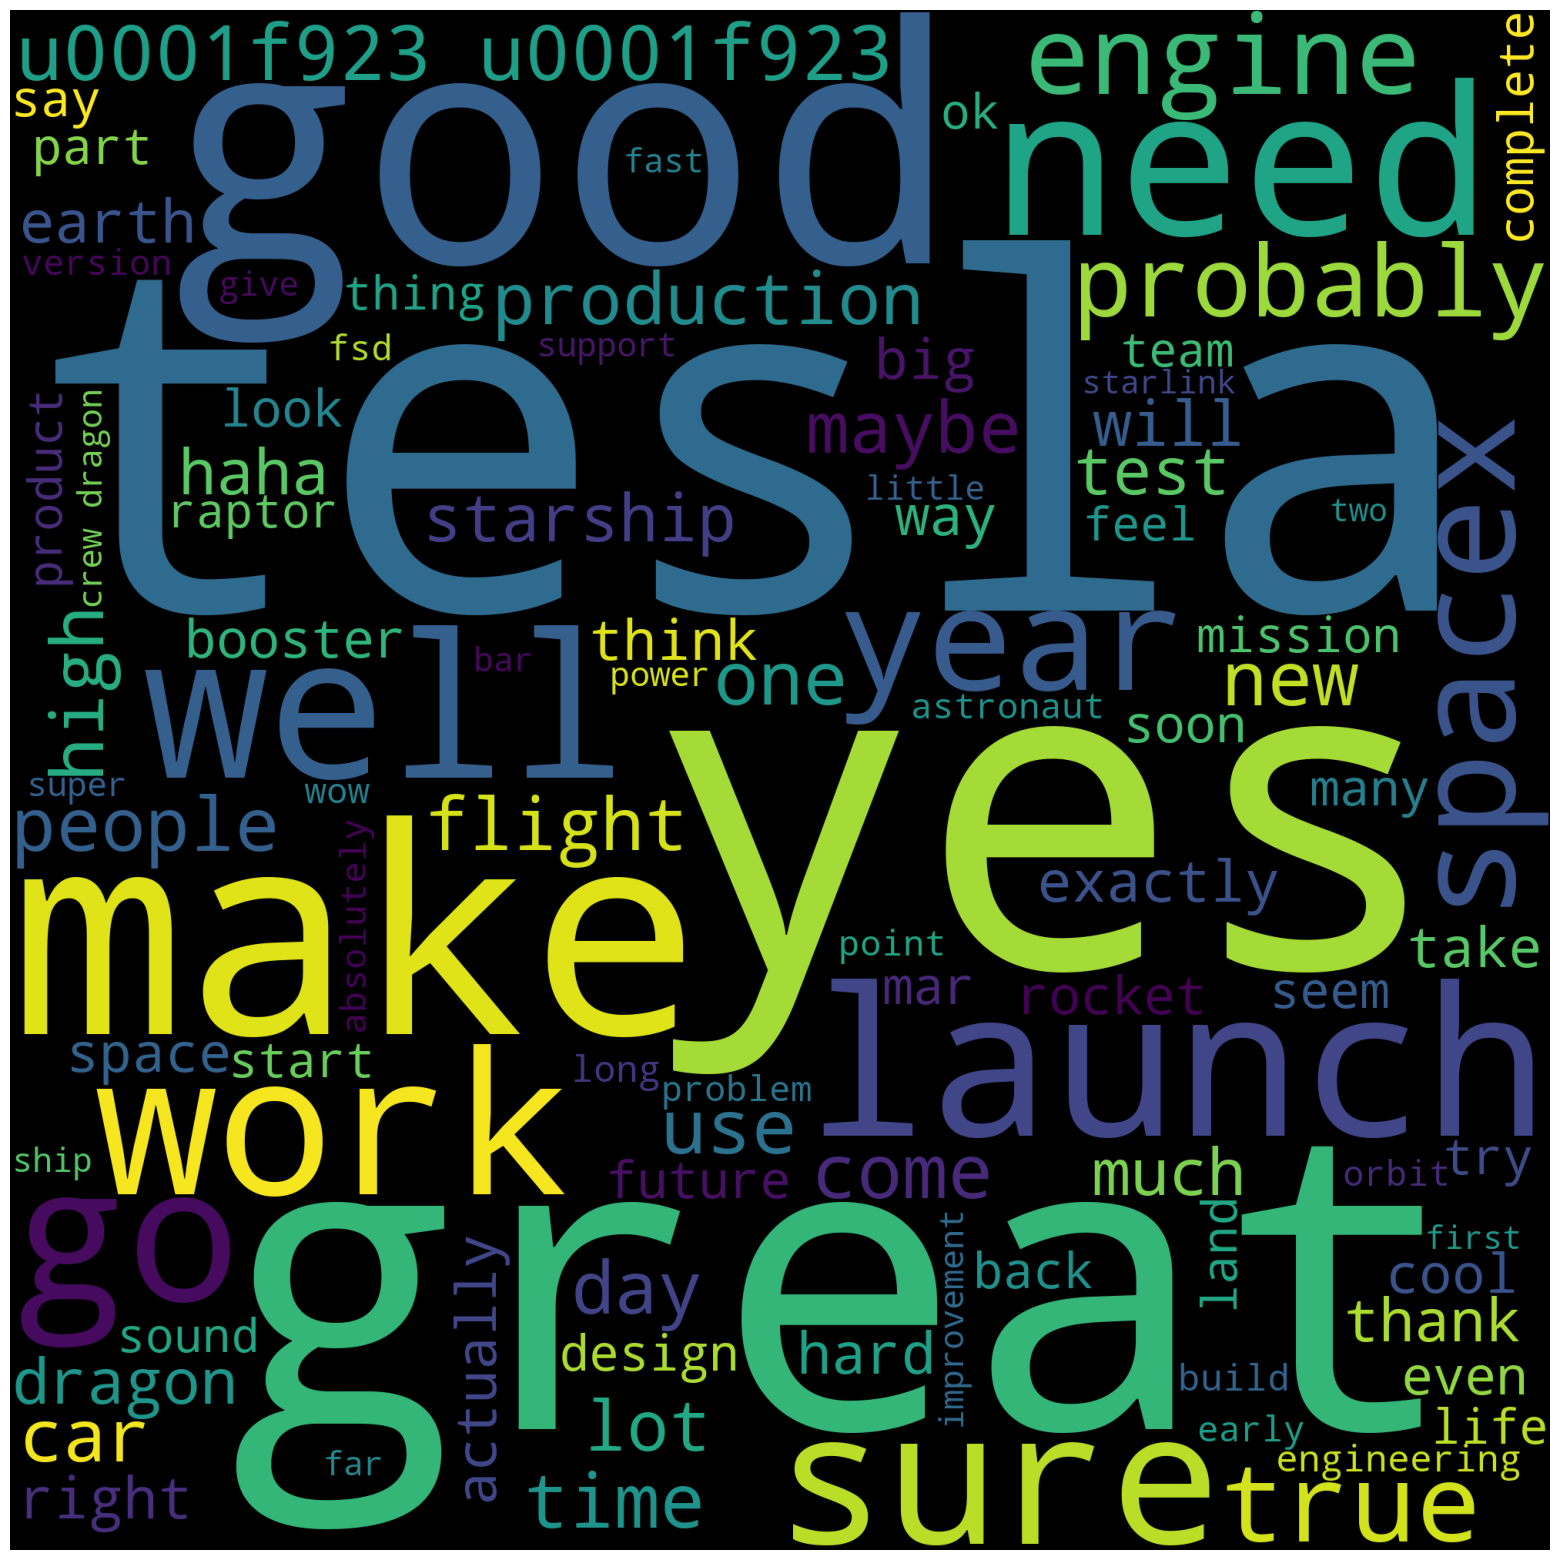

In [259]:
# Generate wordcloud

stopwords = STOPWORDS
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

wordcloud = WordCloud(width = 2000 , height = 2000 , background_color = 'black' , max_words = 100 , stopwords = stopwords).generate(clean_tweets)

plot_cloud(wordcloud)

In [257]:
## Parts of speech (POS) Tagging


In [262]:
for token in doc_block[100:200]:
    print(token,token.pos_)

element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
httpstco3pwt NOUN
yes INTJ
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
httpstco9z8ac6skqx PROPN
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
httpstco7j1c92hdjl PROPN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADV
httpstcoxmyi7qwsgw PROPN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
u0001f923 PROPN
u0001f923 PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
httpstcofsw5ianl0r VERB
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
tab

In [263]:
## Filtering the nouns and verbs only

In [265]:
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN' , 'VERB')]
print(noun_verbs[100:200])

['fix', 'unit', 'time', 't', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ðogecoin', 'video', 'httpstcoueeocofctb', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'httpstcovso9h4ioe', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine']


In [266]:
# Counting the noun & verb tokens

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

In [268]:
cv = CountVectorizer()

In [270]:
x = cv.fit_transform(noun_verbs)

In [271]:
sum_words = x.sum(axis = 0)

In [272]:
word_freq = [(word,sum_words[0 , idx]) for word,idx in cv.vocabulary_.items()]

In [274]:
word_freq = sorted(word_freq , key = lambda x: x[1]  , reverse = True)

wd_df = pd.DataFrame(word_freq)


In [275]:
wd_df.columns = ['word', 'count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,75
1,make,64
2,launch,62
3,year,49
4,work,47
5,need,47
6,go,43
7,come,41
8,day,38
9,get,37


In [276]:
## Visualizing result (Barchart for top 10 nouns + verbs)

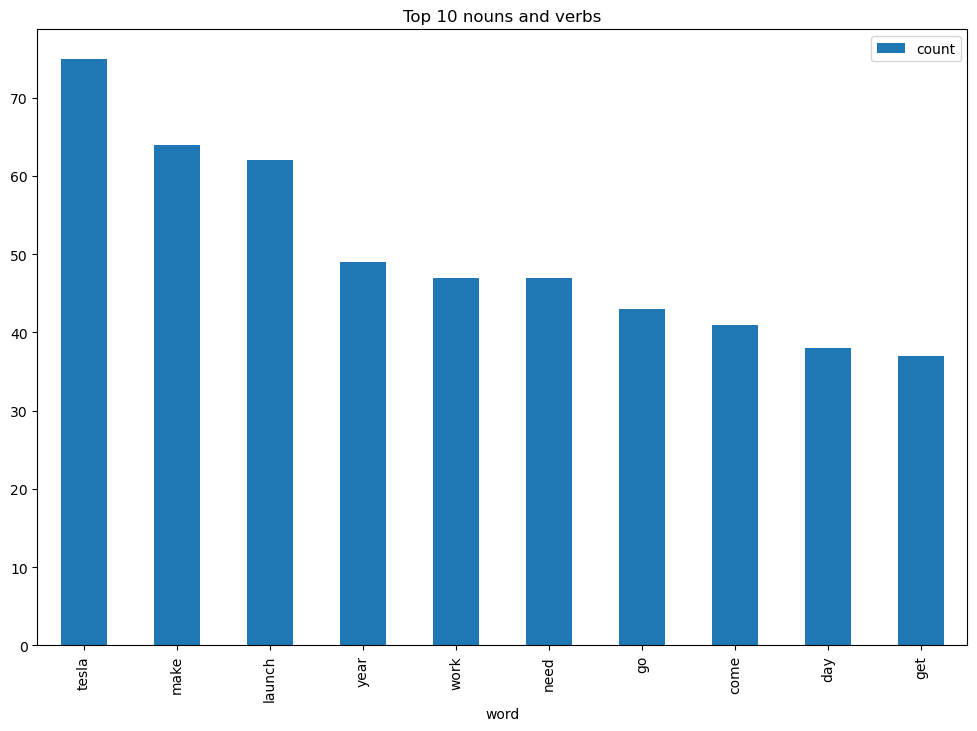

In [280]:
wd_df[0:10].plot.bar(x = 'word' , figsize = (12 , 8),title='Top 10 nouns and verbs');

In [281]:
## Emotion Mining - Sentiment Analysis

In [282]:
from nltk import tokenize

In [284]:
sentence = tokenize.sent_tokenize(' '.join(tweets))


In [285]:
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [287]:
sent_df = pd.DataFrame(sentence, columns = ['sentence'])

In [288]:
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [289]:
## Emotion Lexicon - affin

In [304]:
affin = pd.read_csv( r"C:\Users\user\Downloads\Afinn.csv", sep=',' ,encoding= 'Latin-1')

In [305]:
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [306]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [307]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [308]:
nlp = spacy.load('en_core_web_sm')

In [309]:
sentiment_lexicon = affinity_scores

In [312]:
def calculate_sentiment(text:str=None):
    sent_score =0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [313]:
calculate_sentiment(text='great')

3

In [314]:
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)

In [315]:
sent_df['sentiment_value']

0      0
1      0
2      0
3      0
4      0
      ..
919    0
920    0
921    0
922    0
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [316]:

sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)


In [317]:
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [318]:
sent_df.sort_values(by = 'sentiment_value')

,sentence,sentiment_value,word_count
614,Problems like that have been addressed.,-2,6
380,No problem if theres a way get current design...,-1,13
550,No more hydraulics.,-1,3
243,No heat shielding needed.,-1,4
79,No question that FSD should be viewed as reaso...,-1,14
...,...,...,...
730,Great mission patch design!,3,4
855,Impressive Tianwen-1 Mars rover mission launch...,3,102
74,Excited about offering low-cost access to o h...,3,23
801,Best boss battle song ever.,3,5


In [319]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.070346
std        0.454218
min       -2.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: sentiment_value, dtype: float64

In [320]:
## Negative sentiment score

In [321]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",0,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47


In [322]:
## positive sentiment analysis

sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
20,Improve ship &amp; booster mass @michaelhodapp...,2,10
74,Excited about offering low-cost access to o h...,3,23
89,Good progress towards our Hop in &amp; go to ...,3,11
94,Help would be appreciated.,2,4
106,Hopefully.,2,1
121,Huge thanks to all those who made this possible.,1,9
146,Great game.,3,2
164,Thanks to everyone who worked so hard to make ...,2,11
176,Hopefully launching tomorrow.,2,3
236,Improvement should be significant.,2,4


In [323]:
# Adding index columns 

sent_df['index'] = range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,0,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",0,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


<Axes: xlabel='sentiment_value', ylabel='Density'>

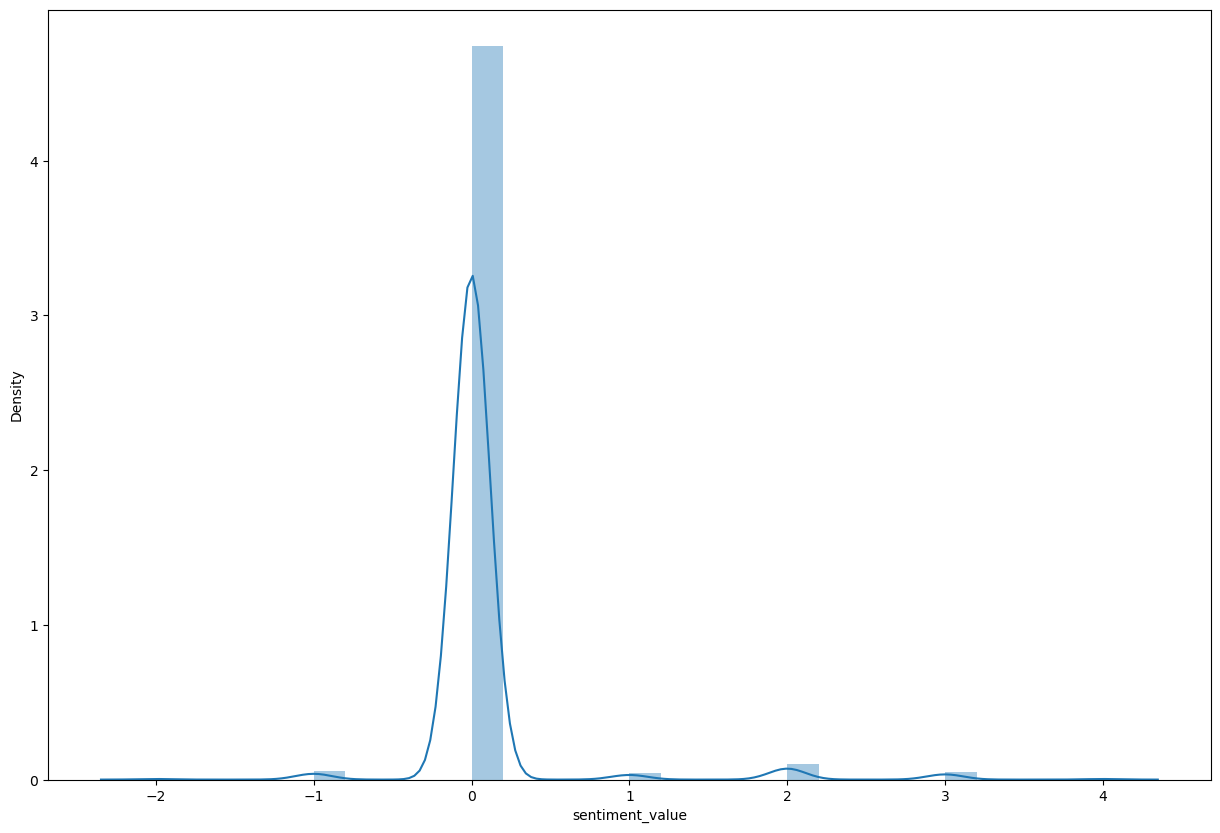

In [324]:
plt.figure(figsize = (15,10))
sn.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

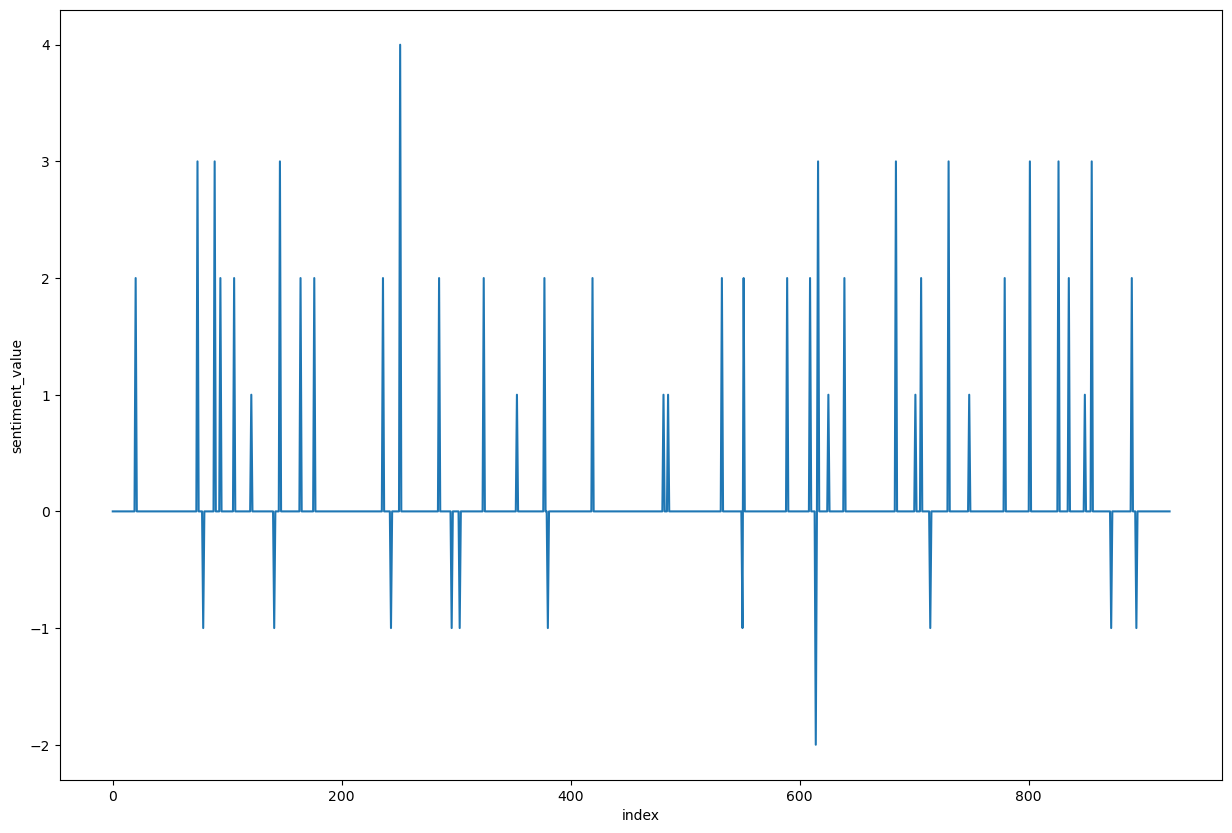

In [325]:

plt.figure(figsize = (15 ,10))
sn.lineplot(y = 'sentiment_value' , x = 'index' , data = sent_df)